In [1]:
import os
import sys
import collections

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from torch_lr_finder import LRFinder

In [2]:
sys.path.append('../')

In [3]:
from datasets.wafer import Wafer40Dataset, get_dataloader
from models.config import VGG_BACKBONE_CONFIGS
from models.vgg import VGGBackbone
from models.head import GAPClassifier

# 1. Load Data

In [4]:
filepath = '../data/processed/group_0/wafer40.00.npz'

In [5]:
batch_size = 256

train_set = Wafer40Dataset(filepath, mode='train', return_mask=False)
valid_set = Wafer40Dataset(filepath, mode='valid', return_mask=False)
train_loader = get_dataloader(train_set, batch_size, shuffle=True)
valid_loader = get_dataloader(valid_set, batch_size)

# 2. Search Learning Rate

In [6]:
def create_model():
    backbone = VGGBackbone(
        layer_config=VGG_BACKBONE_CONFIGS['6a'],
        in_channels=1,
        batch_norm=False)
    
    classifier = GAPClassifier(
        input_shape=backbone.output_shape,
        num_classes=Wafer40Dataset.NUM_CLASSES
    )
    
    return nn.Sequential(backbone, classifier)

In [7]:
epochs = 10
steps_per_epoch = train_loader.batch_size
num_iter = steps_per_epoch * epochs

In [8]:
criterion = nn.CrossEntropyLoss(reduction='mean')

In [9]:
lr_start = 0.0005
lr_end   = 0.2

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


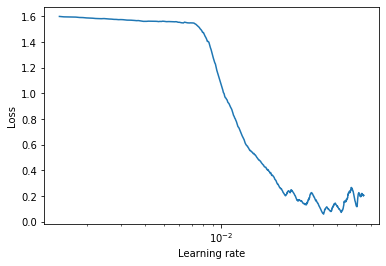

In [10]:
model = create_model()
optimizer = optim.AdamW(model.parameters(), lr=lr_start, weight_decay=0.01)
lr_finder = LRFinder(model, optimizer, criterion, device='cuda')
lr_finder.range_test(train_loader, end_lr=lr_end, num_iter=num_iter, step_mode='linear')
lr_finder.plot()